60.単語ベクトルの読み込みと表示

In [4]:
import gdown

url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=b3a42452-ddbd-41ac-87dd-e95ddc101afb
To: /net/nas5/data/home/sugihara/workspace/NLP100_60~69/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [01:00<00:00, 27.3MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [8]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [6]:
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

61.単語の類似度

In [7]:
print(model.similarity('United_States', 'U.S.'))

0.73107743


62.類似度の高い単語10件

In [8]:
print(model.most_similar('United_States')[0])

('Unites_States', 0.7877248525619507)


63.加法構成性によるアナロジー

In [9]:
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid']))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


64.アナロジーデータでの実験

In [10]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2023-05-28 23:11:31--  http://download.tensorflow.org/data/questions-words.txt
download.tensorflow.org (download.tensorflow.org) をDNSに問いあわせています... 142.250.206.240, 2404:6800:400a:804::2010
download.tensorflow.org (download.tensorflow.org)|142.250.206.240|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 603955 (590K) [text/plain]
`questions-words.txt.1' に保存中

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    時間 0.05s   

2023-05-28 23:11:32 (10.5 MB/s) - `questions-words.txt.1' へ保存完了 [603955/603955]



In [11]:
!head questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [12]:
with open('questions-words.txt', 'r') as f1:
    with open('questions-words_add.txt', 'w') as f2:
        for line in f1:
            line = line.split()
            if line[0] == ':':
                f2.write(''.join(line + ['\n']))
            else:
                word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
                f2.write(' '.join(line + [word + ' ' + str(cos) + '\n']))

In [13]:
!head questions-words_add.txt

:capital-common-countries
Athens Greece Baghdad Iraq Iraqi 0.635187029838562
Athens Greece Bangkok Thailand Thailand 0.7137669324874878
Athens Greece Beijing China China 0.7235778570175171
Athens Greece Berlin Germany Germany 0.6734622716903687
Athens Greece Bern Switzerland Switzerland 0.4919748306274414
Athens Greece Cairo Egypt Egypt 0.7527808547019958
Athens Greece Canberra Australia Australia 0.583732545375824
Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
Athens Greece Havana Cuba Cuba 0.6460990905761719


65.アナロジータスクでの正解率

In [3]:
with open('questions-words_add.txt', 'r') as f:
    true_sem = 0 # 一致したものをカウント
    true_syn = 0
    all_sem = 0 # 全ての数をカウント
    all_syn = 0
    analogy = None
    for line in f:
        if line.startswith(':'): # その行の内容がカテゴリ名かどうかを判別
            if 'gram' in line: # カテゴリ名に'gram'が含まれているか判別
                analogy = 0
            else:
                analogy = 1
        else:
            line = line.split()
            if analogy == 0: # 文法的アナロジーの場合
                all_syn += 1
                if line[3] == line[4]:
                    true_syn += 1
            elif analogy == 1: # 意味的アナロジーの場合
                all_sem += 1
                if line[3] == line[4]:
                    true_sem += 1

print(f'意味的アナロジーの正解率：{true_sem/all_sem}')
print(f'文法的アナロジーの正解率：{true_syn/all_syn}')

意味的アナロジーの正解率：0.7308602999210734
文法的アナロジーの正解率：0.7400468384074942


66.WordSimilarity-353での評価

In [19]:
!wget --no-check-certificate http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2023-05-28 23:54:15--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
www.gabrilovich.com (www.gabrilovich.com) をDNSに問いあわせています... 208.97.177.37
www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 301 Moved Permanently
場所: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [続く]
--2023-05-28 23:54:16--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
gabrilovich.com (gabrilovich.com) をDNSに問いあわせています... 208.97.177.37
gabrilovich.com (gabrilovich.com)|208.97.177.37|:443 に接続しています... 接続しました。
警告: gabrilovich.com の証明書(発行者: `CN=R3,O=Let\'s Encrypt,C=US')の検証に失敗しました:
  発行された証明書は失効しています。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 23257 (23K) [application/zip]
`wordsim353.zip' に保存中

wordsim353.zip      100%[===================>]  22.71K   127KB/s    時間 0.2s    

2023-05-28 23:54:16 (127 KB/s) - `wordsim353.zip' へ保存完了 [23257/23257]

/bin/bash: unzip: コマンドが見つかりません


In [20]:
!head -10 'combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [6]:
ws353 = []
with open('combined.csv', 'r') as f:
    next(f) #1行目をスキップ
    for line in f:
        line = [s.strip() for s in line.split(',')]
        line.append(model.similarity(line[0], line[1])) # 単語ベクトルにより計算される類似度を追加
        ws353.append(line)

for i in range(5):
    print(ws353[i])

['love', 'sex', '6.77', 0.26393774]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [5]:
import numpy as np
from scipy.stats import spearmanr

In [64]:
human = np.array(ws353).T[2]
w2v = np.array(ws353).T[3]
corr, pvalue = spearmanr(human, w2v)
print(f'スピアマン相関係数：{corr:.3f}')

スピアマン相関係数：0.685


67.k-meansクラスタリング

In [9]:
country_names = set()
with open('questions-words.txt') as f:
    is_country = None
    for line in f:
        if line.startswith(':'): # その行がカテゴリ名を表しているかどうかの判別
            if 'capital-common-countries' in line or 'capital-world' in line:
                is_country = 0
            elif 'currency' in line or 'gram6-nationality-adjective' in line:
                is_country = 1
            else:
                is_country = 2
        else:
            line = line.split()
            if is_country == 0:
                country_names.add(line[1])
            elif is_country == 1:
                country_names.add(line[0])
country_names = list(country_names)

country_vec = [model[country] for country in country_names]
print(country_names)

['Slovenia', 'Turkey', 'Ireland', 'Belarus', 'Samoa', 'Lebanon', 'Finland', 'India', 'Kazakhstan', 'Macedonia', 'Colombia', 'Gabon', 'Suriname', 'Zambia', 'Bangladesh', 'Ukraine', 'Portugal', 'Bahrain', 'Kenya', 'Serbia', 'Liechtenstein', 'Taiwan', 'Bahamas', 'Iraq', 'Slovakia', 'Morocco', 'Madagascar', 'Belgium', 'Cambodia', 'Qatar', 'Pakistan', 'Romania', 'Russia', 'Bulgaria', 'Fiji', 'Sudan', 'Burundi', 'Greenland', 'England', 'Honduras', 'Canada', 'Greece', 'Italy', 'Iran', 'Azerbaijan', 'Albania', 'Nicaragua', 'Rwanda', 'Croatia', 'Mexico', 'Latvia', 'Jordan', 'Mauritania', 'Denmark', 'Namibia', 'Guinea', 'Gambia', 'Australia', 'Tuvalu', 'Peru', 'Somalia', 'Libya', 'Spain', 'Nepal', 'Botswana', 'Switzerland', 'USA', 'Laos', 'Argentina', 'Europe', 'Mozambique', 'Montenegro', 'Venezuela', 'Armenia', 'Malawi', 'Brazil', 'Korea', 'Nigeria', 'China', 'Guyana', 'Eritrea', 'Uganda', 'Jamaica', 'Norway', 'Cyprus', 'Chile', 'Poland', 'Mali', 'Netherlands', 'Philippines', 'Algeria', 'Oman',

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(country_vec)
for i in range(5): # クラスターごとに表示
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([country_names[k] for k in cluster]))

/home/sugihara/anaconda3/envs/NLP100/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0
Lebanon, India, Bangladesh, Bahrain, Taiwan, Iraq, Morocco, Cambodia, Qatar, Pakistan, Iran, Jordan, Libya, Nepal, Laos, Korea, China, Oman, Thailand, Afghanistan, Indonesia, Israel, Syria, Bhutan, Vietnam, Malaysia, Egypt
cluster 1
Slovenia, Turkey, Belarus, Kazakhstan, Macedonia, Ukraine, Serbia, Slovakia, Romania, Russia, Bulgaria, Greece, Azerbaijan, Albania, Croatia, Latvia, Montenegro, Armenia, Cyprus, Poland, Moldova, Uzbekistan, Lithuania, Kyrgyzstan, Georgia, Turkmenistan, Estonia, Tajikistan, Hungary
cluster 2
Ireland, Samoa, Finland, Portugal, Liechtenstein, Belgium, Greenland, England, Canada, Italy, Denmark, Australia, Tuvalu, Spain, Switzerland, USA, Europe, Norway, Netherlands, Japan, Sweden, France, Austria, Malta, Iceland, Germany
cluster 3
Gabon, Zambia, Kenya, Madagascar, Fiji, Sudan, Burundi, Rwanda, Mauritania, Namibia, Guinea, Gambia, Somalia, Botswana, Mozambique, Malawi, Nigeria, Eritrea, Uganda, Mali, Algeria, Liberia, Ghana, Senegal, Niger, Angola, T

68.Ward法によるクラスタリング

In [11]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

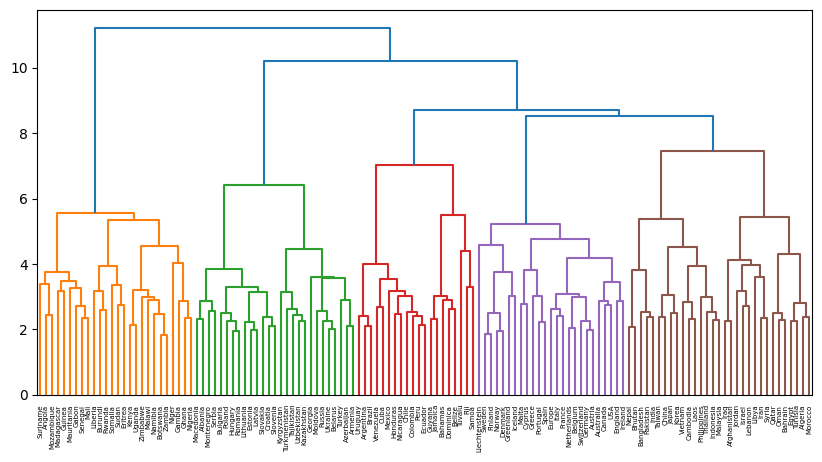

In [57]:
ward = linkage(country_vec, method='ward') # Ward法によるクラスタリング
plt.figure(figsize=(10, 5))
dendrogram(ward, labels=country_names) # デンドログラムで表示
plt.show()

69.t-SNEによる可視化

In [2]:
from sklearn.manifold import TSNE

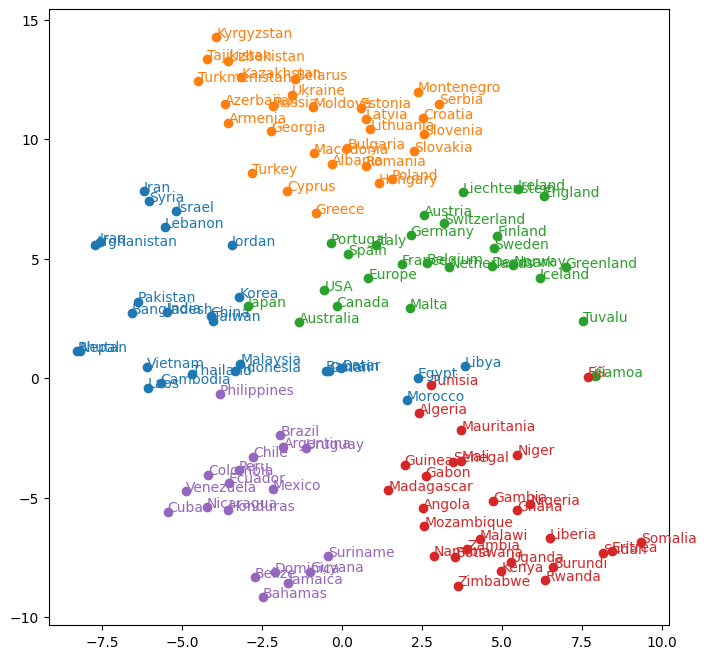

In [17]:
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(np.array(country_vec))
plt.figure(figsize=(8, 8))
for x, country, color in zip(X_embedded, country_names, kmeans.labels_):
    plt.scatter(x[0], x[1], color='C{}'.format(color))
    plt.text(x[0], x[1], country, color='C{}'.format(color))
plt.show()